In [1]:
# 第一个代码块：导入必要的库
import requests
import json
from typing import Dict, List

# API基础URL
BASE_URL = "http://localhost:8000"

In [4]:
def test_single_sms():
    url = f"{BASE_URL}/api/v1/check"
    
    # 测试用例1: 正常的物流通知
    data1 = {
        "signature": "温馨提示",
        "content": "【温馨提示】尊敬的陈孝珍，您的订单已成功完成预定8767套餐，请关注平台：TEL，如有疑问请联系在线客服",
        "business_type": "行业-通知",
        "account_type": "云平台"
    }
        
    test_cases = [data1]
    
    print("=== 单条短信审核测试 ===")
    for i, data in enumerate(test_cases, 1):
        print(f"\n测试用例 {i}:")
        print(f"请求数据: {json.dumps(data, ensure_ascii=False, indent=2)}")
        
        try:
            response = requests.post(url, json=data)
            print(f"状态码: {response.status_code}")
            print(f"响应数据: {json.dumps(response.json(), ensure_ascii=False, indent=2)}")
        except Exception as e:
            print(f"请求失败: {str(e)}")
test_single_sms()

=== 单条短信审核测试 ===

测试用例 1:
请求数据: {
  "signature": "温馨提示",
  "content": "【温馨提示】尊敬的陈孝珍，您的订单已成功完成预定8767套餐，请关注平台：TEL，如有疑问请联系在线客服",
  "business_type": "行业-通知",
  "account_type": "云平台"
}
状态码: 200
响应数据: {
  "passed": false,
  "status": "驳回",
  "business_reason": "中性签名直接不通过",
  "score": null
}


In [ ]:
def test_single_sms():
    url = f"{BASE_URL}/api/v1/check"
    
    # 测试用例1: 正常的物流通知
    data1 = {
        "signature": "顺丰速运",
        "content": "您的快递已到达配送点，请及时取件。",
        "business_type": "行业-物流",
        "account_type": "直客"
    }
    
    # 测试用例2: 包含营销内容的通知
    data2 = {
        "signature": "某商城",
        "content": "优惠活动进行中，点击链接领取红包 http://example.com",
        "business_type": "行业-通知",
        "account_type": "渠道"
    }
    
    # 测试用例3: 会销类短信
    data3 = {
        "signature": "某公司",
        "content": "尊敬的会员，您有一份专属优惠券待领取，限时有效。",
        "business_type": "会销-普通",
        "account_type": "直客"
    }
    
    test_cases = [data1, data2, data3]
    
    print("=== 单条短信审核测试 ===")
    for i, data in enumerate(test_cases, 1):
        print(f"\n测试用例 {i}:")
        print(f"请求数据: {json.dumps(data, ensure_ascii=False, indent=2)}")
        
        try:
            response = requests.post(url, json=data)
            print(f"状态码: {response.status_code}")
            print(f"响应数据: {json.dumps(response.json(), ensure_ascii=False, indent=2)}")
        except Exception as e:
            print(f"请求失败: {str(e)}")
test_single_sms()

In [2]:
# 第六个代码块：测试API根路径
def test_root():
    url = f"{BASE_URL}/"
    print("=== API根路径测试 ===")
    
    try:
        response = requests.get(url)
        print(f"状态码: {response.status_code}")
        print(f"响应数据: {json.dumps(response.json(), ensure_ascii=False, indent=2)}")
    except Exception as e:
        print(f"请求失败: {str(e)}")

# 运行测试
test_root()

=== API根路径测试 ===
状态码: 200
响应数据: {
  "message": "欢迎使用短信审核 API 服务"
}


In [4]:
import pandas as pd

def test_excel_batch():
    try:
        df = pd.read_excel('合并审核.xlsx')
        
        print("=== Excel批量数据测试 ===")
        print(f"读取到 {len(df)} 条测试数据")
        
        # 构建批量请求数据
        sms_list = []
        for _, row in df.iterrows():
            sms_list.append({
                "signature": str(row['短信签名']),
                "content": str(row['短信内容']),
                "business_type": str(row['客户业务类型']),
                "account_type": str(row['客户类型'])
            })
        
        data = {"sms_list": sms_list}
        print(f"请求数据: {json.dumps(data, ensure_ascii=False, indent=2)}")
        
        try:
            response = requests.post(f"{BASE_URL}/api/v1/batch-check", json=data)
            print(f"状态码: {response.status_code}")
            print(f"响应数据: {json.dumps(response.json(), ensure_ascii=False, indent=2)}")
        except Exception as e:
            print(f"请求失败: {str(e)}")
            
    except Exception as e:
        print(f"读取Excel文件失败: {str(e)}")
        print("请确保Excel文件存在且格式正确")

# 运行批量测试
test_excel_batch()

=== Excel批量数据测试 ===
读取到 10954 条测试数据
读取Excel文件失败: name 'json' is not defined
请确保Excel文件存在且格式正确


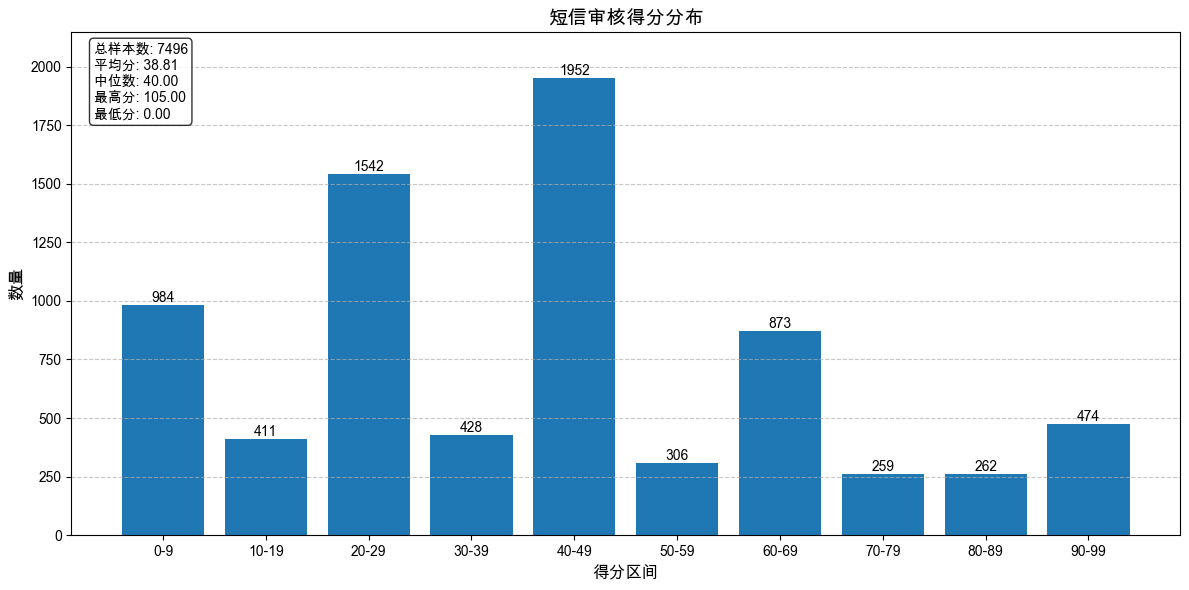


=== 详细统计信息 ===
总样本数: 7496
平均分: 38.81
中位数: 40.00
最高分: 105.00
最低分: 0.00

分数分布:
0-9分: 984条
10-19分: 411条
20-29分: 1542条
30-39分: 428条
40-49分: 1952条
50-59分: 306条
60-69分: 873条
70-79分: 259条
80-89分: 262条
90-99分: 474条


In [9]:
# 导入必要的库
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

def plot_score_distribution():
    try:
        # 读取Excel文件
        df = pd.read_excel('合并审核.xlsx')
        
        # 准备数据
        scores = []
        for _, row in df.iterrows():
            data = {
                "signature": str(row['短信签名']),
                "content": str(row['短信内容']),
                "business_type": str(row['客户业务类型']),
                "account_type": str(row['客户类型'])
            }
            
            # 设置中文字体
            plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # MacOS 的中文字体
            plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
            # 发送请求获取分数
            response = requests.post(f"{BASE_URL}/api/v1/check", json=data)
            result = response.json()
            
            # 只收集有分数的结果
            if result.get('score') is not None:
                scores.append(result['score'])
        
        # 创建分数区间
        bins = np.arange(0, 101, 10)  # 0-100分，每10分一个区间
        labels = [f'{i}-{i+9}' for i in range(0, 100, 10)]
        
        # 统计每个区间的数量
        hist, _ = np.histogram(scores, bins=bins)
        
        # 创建柱状图
        plt.figure(figsize=(12, 6))
        bars = plt.bar(labels, hist)
        
        # 设置标题和标签
        plt.title('短信审核得分分布', fontsize=14)
        plt.xlabel('得分区间', fontsize=12)
        plt.ylabel('数量', fontsize=12)
        
        # 在柱子上添加数值标签
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height,
                    f'{int(height)}',
                    ha='center', va='bottom')
        
        # 添加网格线
        plt.grid(True, axis='y', linestyle='--', alpha=0.7)
        
        # 设置y轴从0开始
        plt.ylim(0, max(hist) * 1.1)
        
        # 添加统计信息
        stats_text = f'总样本数: {len(scores)}\n'
        stats_text += f'平均分: {np.mean(scores):.2f}\n'
        stats_text += f'中位数: {np.median(scores):.2f}\n'
        stats_text += f'最高分: {max(scores):.2f}\n'
        stats_text += f'最低分: {min(scores):.2f}'
        
        plt.text(0.02, 0.98, stats_text,
                transform=plt.gca().transAxes,
                verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        
        # 调整布局
        plt.tight_layout()
        
        # 显示图表
        plt.show()
        
        # 打印详细统计信息
        print("\n=== 详细统计信息 ===")
        print(f"总样本数: {len(scores)}")
        print(f"平均分: {np.mean(scores):.2f}")
        print(f"中位数: {np.median(scores):.2f}")
        print(f"最高分: {max(scores):.2f}")
        print(f"最低分: {min(scores):.2f}")
        print("\n分数分布:")
        for label, count in zip(labels, hist):
            print(f"{label}分: {int(count)}条")
            
    except Exception as e:
        print(f"生成图表时出错: {str(e)}")

# 运行图表生成
plot_score_distribution()

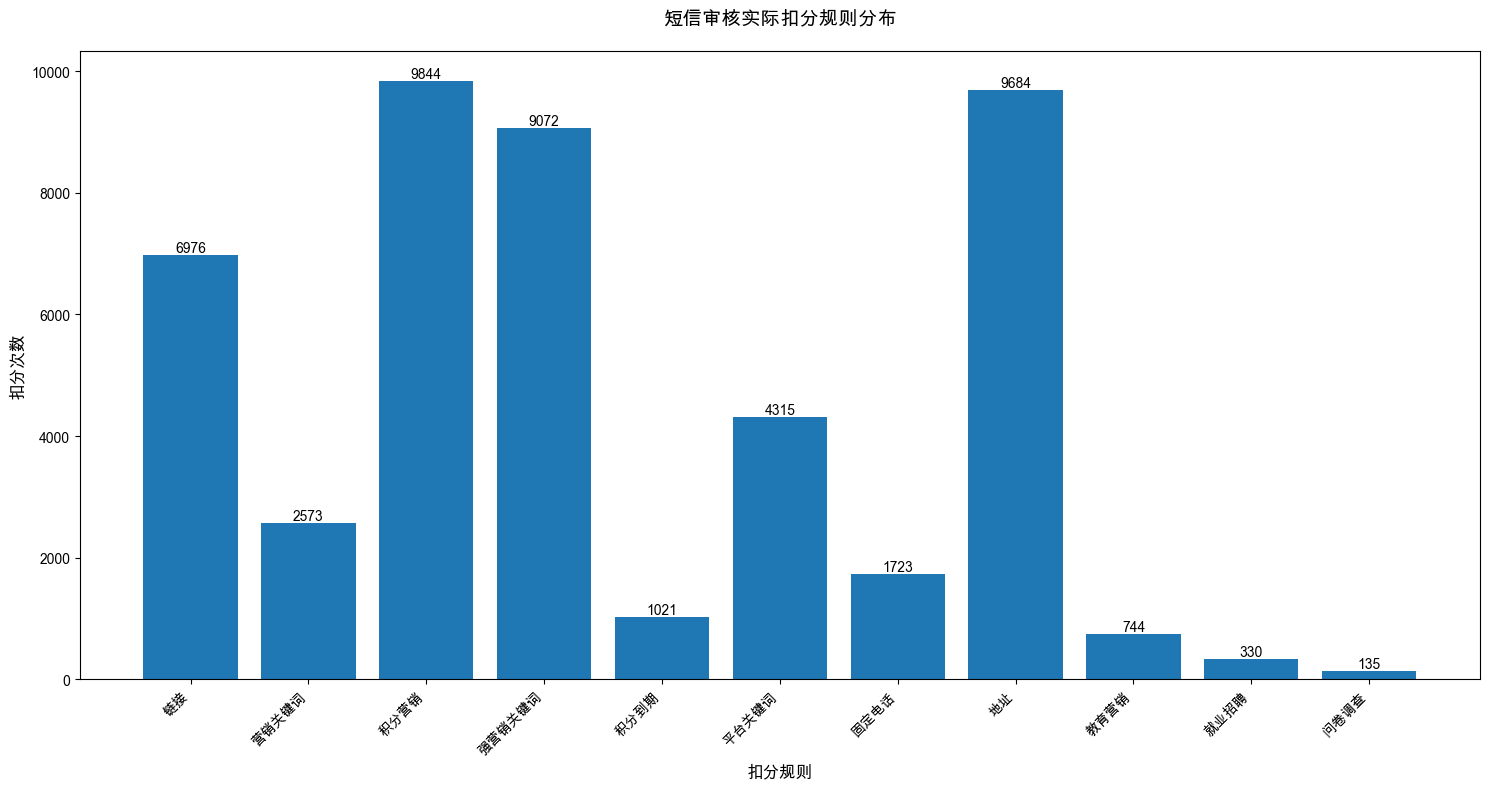


=== 扣分最多的规则（前5名）===
积分营销: 9844次
地址: 9684次
强营销关键词: 9072次
链接: 6976次
平台关键词: 4315次


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from business import BusinessValidator
from collections import defaultdict

def analyze_deduction_rules():
    # 设置中文字体
    plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # MacOS 的中文字体
    plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
    
    # 创建BusinessValidator实例
    validator = BusinessValidator()
    
    # 读取Excel文件
    try:
        df = pd.read_excel("合并审核.xlsx")
    except Exception as e:
        print(f"读取Excel文件失败: {e}")
        return
        
    # 初始化扣分统计
    deduction_counts = defaultdict(int)
    
    # 处理每一行数据
    for _, row in df.iterrows():
        # 清理内容和签名
        cleaned_content = validator._clean_content(row['短信内容'])
        cleaned_signature = validator._clean_content(row['短信签名'])
        business_type = row['客户业务类型']
        
        # 检查固定电话
        has_fixed_phone, fixed_phone_count = validator._contains_fixed_phone(cleaned_content)
        if has_fixed_phone:
            deduction_counts['固定电话'] += fixed_phone_count
            
        # 检查链接
        has_link, link_count = validator._contains_link(cleaned_content)
        if has_link:
            deduction_counts['链接'] += link_count
            
        # 检查营销关键词
        for keyword in validator.SCORE_RULES['DEDUCTIONS']['MARKETING']['keywords']:
            if keyword in cleaned_content:
                deduction_counts['营销关键词'] += 1
                
        # 检查强营销关键词
        for keyword in validator.SCORE_RULES['DEDUCTIONS']['MARKETING']['strong_keywords']:
            if keyword in cleaned_content:
                deduction_counts['强营销关键词'] += 1
                
        # 检查积分营销关键词
        for keyword in validator.SCORE_RULES['DEDUCTIONS']['POINTS_MARKETING']['keywords']:
            if keyword in cleaned_content:
                deduction_counts['积分营销'] += 1
                
        # 检查积分到期关键词
        for keyword in validator.SCORE_RULES['DEDUCTIONS']['POINTS_EXPIRY']['keywords']:
            if keyword in cleaned_content:
                deduction_counts['积分到期'] += 1
                
        # 检查平台关键词
        for keyword in validator.SCORE_RULES['DEDUCTIONS']['PLATFORM']['keywords']:
            if keyword in cleaned_content:
                deduction_counts['平台关键词'] += 1
                
        # 检查就业招聘关键词
        for keyword in validator.SCORE_RULES['DEDUCTIONS']['EMPLOYMENT']['keywords']:
            if keyword in cleaned_content:
                deduction_counts['就业招聘'] += 1
                
        # 检查问卷调查关键词
        for keyword in validator.SCORE_RULES['DEDUCTIONS']['SURVEY']['keywords']:
            if keyword in cleaned_content:
                deduction_counts['问卷调查'] += 1
                
        # 检查教育营销关键词
        for keyword in validator.SCORE_RULES['DEDUCTIONS']['EDUCATION']['keywords']:
            if keyword in cleaned_content:
                deduction_counts['教育营销'] += 1
                
        # 检查地址
        has_address, address_score, _ = validator._contains_address(cleaned_content)
        if has_address:
            deduction_counts['地址'] += address_score
    
    # 准备绘图数据
    rule_names = list(deduction_counts.keys())
    counts = list(deduction_counts.values())
    
    # 创建图形
    plt.figure(figsize=(15, 8))
    
    # 创建条形图
    bars = plt.bar(range(len(rule_names)), counts)
    
    # 设置标题和标签
    plt.title('短信审核实际扣分规则分布', fontsize=14, pad=20)
    plt.xlabel('扣分规则', fontsize=12)
    plt.ylabel('扣分次数', fontsize=12)
    
    # 设置x轴标签
    plt.xticks(range(len(rule_names)), rule_names, rotation=45, ha='right')
    
    # 在柱子上添加数值标签
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom')
    
    # 调整布局
    plt.tight_layout()
    
    # 显示图片
    plt.show()
    
    # 打印扣分最多的规则
    print("\n=== 扣分最多的规则（前5名）===")
    sorted_rules = sorted(deduction_counts.items(), key=lambda x: x[1], reverse=True)
    for rule_name, count in sorted_rules[:5]:
        print(f"{rule_name}: {count}次")

if __name__ == "__main__":
    analyze_deduction_rules() 

/var/folders/g5/7ywkrjs52mn6f4r8ws5jsw8c0000gn/T/ipykernel_64586/1934345816.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')  # 使用seaborn样式美化图表
/var/folders/g5/7ywkrjs52mn6f4r8ws5jsw8c0000gn/T/ipykernel_64586/1934345816.py:120: UserWarning: Glyph 35302 (\N{CJK UNIFIED IDEOGRAPH-89E6}) missing from current font.
  plt.tight_layout()
/var/folders/g5/7ywkrjs52mn6f4r8ws5jsw8c0000gn/T/ipykernel_64586/1934345816.py:120: UserWarning: Glyph 21457 (\N{CJK UNIFIED IDEOGRAPH-53D1}) missing from current font.
  plt.tight_layout()
/var/folders/g5/7ywkrjs52mn6f4r8ws5jsw8c0000gn/T/ipykernel_64586/1934345816.py:120: UserWarning: Glyph 27425 (\N{CJK UNIFIED IDEOGRAPH-6B21}) missing from current font.
  plt.tight_layout()
/var/folders/g5/7ywkrjs52

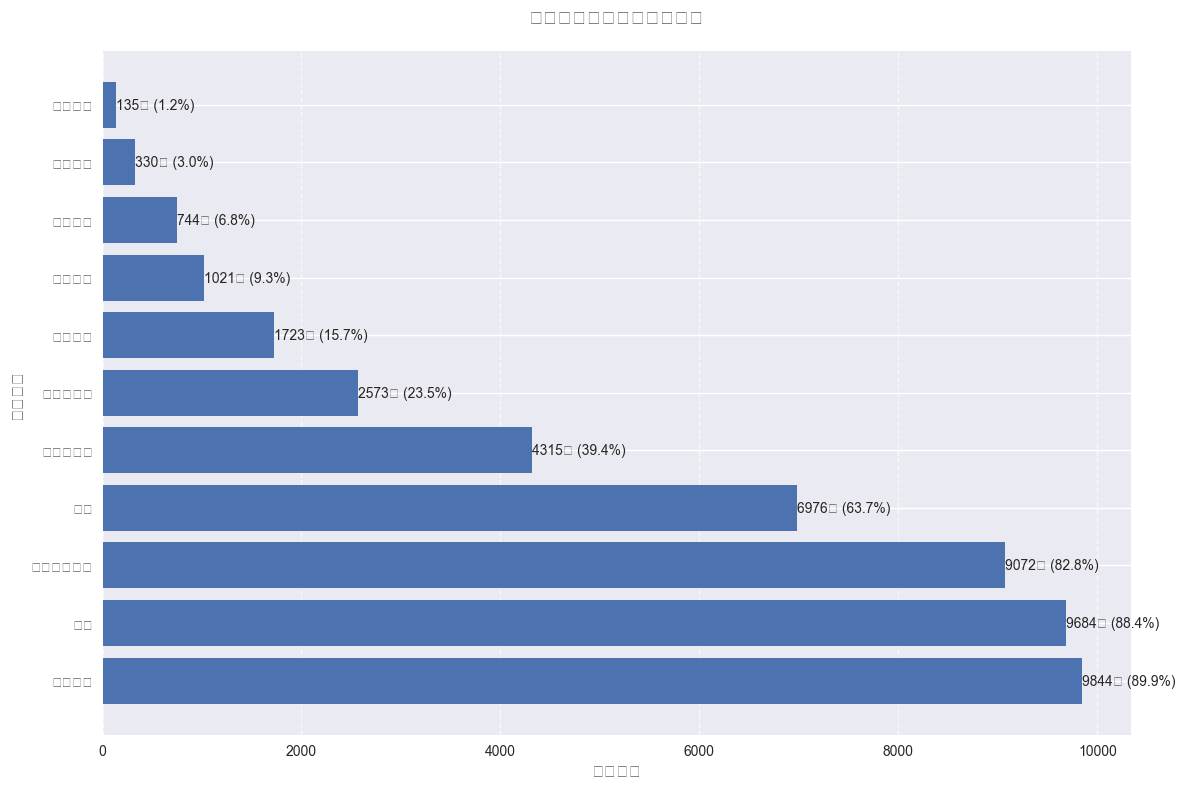


总短信数量: 10954条

=== 扣分规则触发统计（前5名）===
积分营销: 9844次 (89.9%)
地址: 9684次 (88.4%)
强营销关键词: 9072次 (82.8%)
链接: 6976次 (63.7%)
平台关键词: 4315次 (39.4%)


In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from business import BusinessValidator
from collections import defaultdict

def analyze_deduction_rules():
    # 设置中文字体
    plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # MacOS 的中文字体
    plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
    plt.style.use('seaborn')  # 使用seaborn样式美化图表
    
    # 创建BusinessValidator实例
    validator = BusinessValidator()
    
    # 读取Excel文件
    try:
        df = pd.read_excel("合并审核.xlsx")
    except Exception as e:
        print(f"读取Excel文件失败: {e}")
        return
        
    # 初始化扣分统计
    deduction_counts = defaultdict(int)
    total_messages = len(df)  # 总短信数量
    
    # 处理每一行数据
    for _, row in df.iterrows():
        # 清理内容和签名
        cleaned_content = validator._clean_content(row['短信内容'])
        cleaned_signature = validator._clean_content(row['短信签名'])
        business_type = row['客户业务类型']
        
        # 检查固定电话
        has_fixed_phone, fixed_phone_count = validator._contains_fixed_phone(cleaned_content)
        if has_fixed_phone:
            deduction_counts['固定电话'] += fixed_phone_count
            
        # 检查链接
        has_link, link_count = validator._contains_link(cleaned_content)
        if has_link:
            deduction_counts['链接'] += link_count
            
        # 检查营销关键词
        for keyword in validator.SCORE_RULES['DEDUCTIONS']['MARKETING']['keywords']:
            if keyword in cleaned_content:
                deduction_counts['营销关键词'] += 1
                
        # 检查强营销关键词
        for keyword in validator.SCORE_RULES['DEDUCTIONS']['MARKETING']['strong_keywords']:
            if keyword in cleaned_content:
                deduction_counts['强营销关键词'] += 1
                
        # 检查积分营销关键词
        for keyword in validator.SCORE_RULES['DEDUCTIONS']['POINTS_MARKETING']['keywords']:
            if keyword in cleaned_content:
                deduction_counts['积分营销'] += 1
                
        # 检查积分到期关键词
        for keyword in validator.SCORE_RULES['DEDUCTIONS']['POINTS_EXPIRY']['keywords']:
            if keyword in cleaned_content:
                deduction_counts['积分到期'] += 1
                
        # 检查平台关键词
        for keyword in validator.SCORE_RULES['DEDUCTIONS']['PLATFORM']['keywords']:
            if keyword in cleaned_content:
                deduction_counts['平台关键词'] += 1
                
        # 检查就业招聘关键词
        for keyword in validator.SCORE_RULES['DEDUCTIONS']['EMPLOYMENT']['keywords']:
            if keyword in cleaned_content:
                deduction_counts['就业招聘'] += 1
                
        # 检查问卷调查关键词
        for keyword in validator.SCORE_RULES['DEDUCTIONS']['SURVEY']['keywords']:
            if keyword in cleaned_content:
                deduction_counts['问卷调查'] += 1
                
        # 检查教育营销关键词
        for keyword in validator.SCORE_RULES['DEDUCTIONS']['EDUCATION']['keywords']:
            if keyword in cleaned_content:
                deduction_counts['教育营销'] += 1
                
        # 检查地址
        has_address, address_score, _ = validator._contains_address(cleaned_content)
        if has_address:
            deduction_counts['地址'] += address_score
    
    # 对数据进行排序
    sorted_items = sorted(deduction_counts.items(), key=lambda x: x[1], reverse=True)
    rule_names, counts = zip(*sorted_items)
    
    # 创建图形
    plt.figure(figsize=(12, 8))
    
    # 创建水平条形图
    y_pos = np.arange(len(rule_names))
    bars = plt.barh(y_pos, counts)
    
    # 设置标题和标签
    plt.title('短信审核扣分规则触发分布', fontsize=14, pad=20)
    plt.xlabel('触发次数', fontsize=12)
    plt.ylabel('扣分规则', fontsize=12)
    
    # 设置y轴标签
    plt.yticks(y_pos, rule_names)
    
    # 在条形上添加数值标签和百分比
    for i, bar in enumerate(bars):
        width = bar.get_width()
        percentage = (width / total_messages) * 100
        plt.text(width, bar.get_y() + bar.get_height()/2,
                f'{int(width)}次 ({percentage:.1f}%)',
                va='center', ha='left', fontsize=10)
    
    # 添加网格线
    plt.grid(True, axis='x', linestyle='--', alpha=0.7)
    
    # 调整布局
    plt.tight_layout()
    
    # 显示图片
    plt.show()
    
    # 打印统计信息
    print(f"\n总短信数量: {total_messages}条")
    print("\n=== 扣分规则触发统计（前5名）===")
    for rule_name, count in sorted_items[:5]:
        percentage = (count / total_messages) * 100
        print(f"{rule_name}: {count}次 ({percentage:.1f}%)")

if __name__ == "__main__":
    analyze_deduction_rules()